# eBay Kleinanzeigen, Classified Section

eBay Germany has a classifieds section. It is called eBay Kleinanzeigen. In this section, cars are offered for sale. This project aims to clean the data scraped from eBay Kleinanzeigen. After cleaning the dataset, we'll do some analysis as we see fit as well. We're looking for anything unusual that would give us some idea of how vehicle brands hold themselves in the market. We're planning on getting away with few insights working through this dataset.

Although initially appearing at Kaggle, this dataset was scraped from eBay Kleinanzeigen. [Dataquest](https://dataquest.io) sampled 50,000 data points from the full dataset, which we're going to use now.

The data dictionary provided with data is as follows:

* **dateCrawled** - When this ad was first crawled. All field-values are taken from this date.
* **name** - Name of the car.
* **seller** - Whether the seller is private or a dealer.
* **offerType** - The type of listing
* **price** - The price on the ad to sell the car.
* **abtest** - Whether the listing is included in an A/B test.
* **vehicleType** - The vehicle Type.
* **yearOfRegistration** - The year in which the car was first registered.
* **gearbox** - The transmission type.
* **powerPS** - The power of the car in PS.
* **model** - The car model name.
* **kilometer** - How many kilometers the car has driven.
* **monthOfRegistration** - The month in which the car was first registered.
* **fuelType** - What type of fuel the car uses.
* **brand** - The brand of the car.
* **notRepairedDamage** - If the car has a damage which is not yet repaired.
* **dateCreated** - The date on which the eBay listing was created.
* **nrOfPictures** - The number of pictures in the ad.
* **postalCode** - The postal code for the location of the vehicle.
* **lastSeenOnline** - When the crawler saw this ad last online.




## Initial data exploration


Let's start by importing the libraries we need and reading the dataset into pandas.

In [1]:
import pandas as pd
import numpy as np

autos = pd.read_csv("datasets/autos.csv", encoding="Latin-1") # encoding is set to Latin-1

In [2]:
autos.shape # 50k rows and 20 columns

(50000, 20)

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


The dates have full-time information including minutes, hours and seconds -except the dateCreated column.

Column names have a unique style in which every column name starts with a lower case. Then any other word that comes after the initial one starts with uppercase. odometer column includes km information, but column values have 'km' in it as a string value. We probably should bring that information to the column name, leaving only digits in the values.

Names seem problematic, as well. They contain a lot of information, and there aren't any particular pattern they're following. All the first elements of the values seem to contain information about the car's model so extracting them may prove useful.

In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

The dataset ends as it starts without any particular change. Here we have a dataset contains 20 columns, most of which are strings. None of the columns contain null information more than it's %20 percentage, so that is good news. The fact that [camelCase](https://en.wikipedia.org/wiki/Camel_case)  method of use in column names is a bit problematic. It's against Python's preferred [Snake_case](https://en.wikipedia.org/wiki/Snake_case) use with underscores.

We're going to start with column names. First, we'll fix the camelCase issue, and further change the name of the columns to be more descriptive.

In [5]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

We're going to do it now: Copy the array of columns' attributes and manually change every block into our matter of taste. The following changes are going to happen: 

* yearOfRegistration to registration_year
* monthOfRegistration to registration_month
* notRepairedDamage to unrepaired_damage
* dateCreated to ad_created
* The rest of the columnn names from camelcase to snakecase.


In [6]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


I've found the previous naming of columns year and month of registration arbitrary. It put the most descriptive quality of the column, the fact that it contains information on registration data at the last word. By moving it to the first word of the name, we both better describe the column and gain a comparative quality between registration year and month.

`dateCreated` was the most problematic one. Because the previous convention didn't even imply that was any different to `date_crawled`. Since both contain dates for different procedures, I preferred changing the naming convention to prevent any confusion that could occur down the rabbit hole.

Now to discover further problems: We're going to describe our data with the parameter: `include all` so, we get both categorical and numeric columns included.

In [7]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-19 17:36:18,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Let's start with extremes. Extreme values that are... too high, too low, too repetitive:

`seller`, `offer_type`, `abtest`, `gearbox`, `unrepaired_damage` columns have all two values for all 50k rows. If we look at their frequencies, `seller` and `offer_type` are very high. Meaning for 50.000 rows in the dataset, 49999 of those rows has the same value! So what use do we have for them?

The other unique valued rows have good distributions that are either 50-50 or 30-70.

`price` and `odometer`, `nr_of_pictures` column, which are after numeric values, are stored as categorical strings. That needs fixing. But since the `nr_of_pictures` column has only one value (0) for every column, we're going to have to drop that as well.

The date containing columns aren't DateTime data type. We're going to have to work with that as well. 

To change `price` and `odometer` to numerical columns we start with removing any string values that would stop us from converting the column to an integer. `price` column has a convention of starting with a dollar sign: $
While the `odometer` column values end with *km* for each row, after removing those characters from their respective columns, we're going to cast our columns to an integer type. To not lose valuable information, we're going to rename the `odometer` column to `odometer_km` to avoid confusion.

In [8]:
autos['price'] = autos['price'].str.replace('$','')
autos['price'] = autos['price'].str.replace(',','').astype(int)
autos['odometer'] = autos['odometer'].str.replace('km','')
autos['odometer'] = autos['odometer'].str.replace(',','').astype(int)
autos.rename({'odometer':'odometer_km'}, axis=1, inplace=True)
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Before looking at different columns, we'll take further care for two of our columns here for more problems, which usually occurs at extremes.

Outliers, so to speak.

In [9]:
print(autos['price'].unique().shape)
autos['odometer_km'].unique().shape

(2357,)


(13,)

Nothings wrong here.

In [10]:
print(autos['price'].describe())
autos['odometer_km'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64


count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

Suspicious max value for an automobile price? Surely looks like an outlier.

In [11]:
print(autos['price'].value_counts().sort_index(ascending=False).head())
autos['odometer_km'].value_counts().sort_index(ascending=False).head()

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
Name: price, dtype: int64


150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
Name: odometer_km, dtype: int64

999999 seems to be too much. So we drop it, setting a threshold.

In [12]:
autos.drop(autos[autos['price'] > 59999999].index, inplace=True)

In [13]:
autos['price'].value_counts().sort_index(ascending=False).head()

27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
Name: price, dtype: int64

The next most pressing issue in our dataset is the time values. We have 5 columns that represent dates, namely:

- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `registration_month`: from the website
- `registration_year`: from the website

As it is, `date_crawled`, `last_seen` and `ad_created` columns are all identified as string values. To understand quantitatively, we need to convert these columns into numerical types. The other two are numerical, and descriptive methods can work on them.

As previously mentioned these columns all represent full timestamp values in the form of: 'Y-M-D H-m-S'

The first 10 characters of these string values in each column can be worked with:

In [14]:
print(autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index())

# str10 to extract the year-month-day information

2016-03-05    0.025381
2016-03-06    0.013940
2016-03-07    0.035961
2016-03-08    0.033301
2016-03-09    0.033221
2016-03-10    0.032121
2016-03-11    0.032481
2016-03-12    0.036781
2016-03-13    0.015560
2016-03-14    0.036621
2016-03-15    0.033981
2016-03-16    0.029501
2016-03-17    0.031521
2016-03-18    0.013060
2016-03-19    0.034901
2016-03-20    0.037821
2016-03-21    0.037521
2016-03-22    0.032921
2016-03-23    0.032381
2016-03-24    0.029101
2016-03-25    0.031741
2016-03-26    0.032481
2016-03-27    0.031041
2016-03-28    0.034841
2016-03-29    0.034181
2016-03-30    0.033621
2016-03-31    0.031921
2016-04-01    0.033801
2016-04-02    0.035401
2016-04-03    0.038681
2016-04-04    0.036521
2016-04-05    0.013100
2016-04-06    0.003180
2016-04-07    0.001420
Name: date_crawled, dtype: float64


Distribution looks fine and there aren't any null values

In [15]:
print(autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index())

2015-06-11    0.000020
2015-08-10    0.000020
2015-09-09    0.000020
2015-11-10    0.000020
2015-12-05    0.000020
                ...   
2016-04-03    0.038921
2016-04-04    0.036881
2016-04-05    0.011840
2016-04-06    0.003260
2016-04-07    0.001280
Name: ad_created, Length: 76, dtype: float64


As you might have guessed ad creation dates covers a longer span of time.

In [16]:
print(autos['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index())

2016-03-05    0.001080
2016-03-06    0.004420
2016-03-07    0.005360
2016-03-08    0.007600
2016-03-09    0.009860
2016-03-10    0.010760
2016-03-11    0.012520
2016-03-12    0.023820
2016-03-13    0.008980
2016-03-14    0.012800
2016-03-15    0.015880
2016-03-16    0.016440
2016-03-17    0.027921
2016-03-18    0.007420
2016-03-19    0.015740
2016-03-20    0.020700
2016-03-21    0.020740
2016-03-22    0.021580
2016-03-23    0.018580
2016-03-24    0.019560
2016-03-25    0.019200
2016-03-26    0.016960
2016-03-27    0.016020
2016-03-28    0.020860
2016-03-29    0.022340
2016-03-30    0.024840
2016-03-31    0.023840
2016-04-01    0.023100
2016-04-02    0.024900
2016-04-03    0.025361
2016-04-04    0.024620
2016-04-05    0.124282
2016-04-06    0.220984
2016-04-07    0.130923
Name: last_seen, dtype: float64


With the same spawn as `date_crawled`, last seen column is free of problems .

In [17]:
autos['registration_year'].describe()

count    49999.000000
mean      2005.073401
std        105.713866
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

A simple question needs to raised right here. 

Our previous findings display the last day in which data crawled was 2016-04-07. So how can the registration dates after 2016 in our dataset happen? The minimum value, the year 1000, is impossible as well.

How low for an automobile's registration date is unreasonable? Realistically, it could be from the early 1900s. So let's play it safe and set our low-cutting filter in 1900.

We need to fix those.

In [18]:
autos.drop(autos[autos['registration_year'] > 2016].index, inplace=True)
autos.drop(autos[autos['registration_year'] < 1900].index, inplace=True)
autos['registration_year'].value_counts(normalize=True).sort_index() # sort index to see lowest and highest values.

1910    0.000187
1927    0.000021
1929    0.000021
1931    0.000021
1934    0.000042
          ...   
2012    0.027547
2013    0.016782
2014    0.013867
2015    0.008308
2016    0.027401
Name: registration_year, Length: 78, dtype: float64

In [19]:
autos['registration_year'].value_counts(normalize=True).sort_values(ascending=False).head(15)

2000    0.069836
2005    0.062777
1999    0.062444
2004    0.056989
2003    0.056781
2006    0.056385
2001    0.056281
2002    0.052741
1998    0.051075
2007    0.047973
2008    0.046453
2009    0.043684
1997    0.042226
2011    0.034023
2010    0.033252
Name: registration_year, dtype: float64

The majority of the entries are for cars registered between 1994 and 2010. And anything before 80s have very insignificant share amount wise. This trend skyrockets especially for entries before 60s.

Let's look at how brands perform by aggregating them. Since this analysis takes a more basic approach we're not going to use pandas groupby but instead aggregate manually with a for loop.

In [20]:
autos['brand'].value_counts(normalize=True).head(10)

volkswagen       0.212131
bmw              0.110021
opel             0.108168
mercedes_benz    0.095342
audi             0.086389
ford             0.069794
renault          0.047348
peugeot          0.029525
fiat             0.025860
seat             0.018177
Name: brand, dtype: float64

For our purposes we're gonna limit our analysis to the brands with highest shares on the market. How should we set our threshold? Is a %1 share market value significant enough? 5 or a 10? I'd like to go with a 5.

In that case renault gets dropped out from our analysis but renault is borderline 5. So lowering that limit to include renault will be approach.

In [21]:
brands = (autos['brand'].value_counts(normalize=True) > 0.04) # Boolean masking to extract those above %4

brands = brands[brands == True].index

agg_brand = {}

for b in brands:
    
    a = autos[autos['brand'] == b]['price'].mean() # for every brand, take the mean of price column
    agg_brand[b] = a

print(agg_brand)

{'volkswagen': 6516.457597173145, 'bmw': 8334.645155185466, 'opel': 5252.61655437921, 'mercedes_benz': 8485.239571958942, 'audi': 9093.65003615329, 'ford': 7263.015811455847, 'renault': 2395.4164467897976}


We seem to have a very established tiers between the brands.

* Audi, BMW and Mercedes Benz are the most expensive - all above 8000 limit.
* Volkswagen seem to be a middle point between high-end luxury cars and middle priced bands (6516)
* Ford and Opel are the other mid tiers (7263 and 5252, respectively)
* Renault is on the cheaper side, averaging at 2400 (2395)

For the top 7 brands, our next step will be, aggregating to understand the average mileage for those cars to see if there's any link with mean prices.

In [22]:
agg_mileage = {}

for b in brands:
    
    a = autos[autos['brand'] == b]['odometer_km'].mean() # for every brand, take the mean of odometer_km column
    agg_mileage[b] = a
    
agg_mileage

{'volkswagen': 128730.36906164115,
 'bmw': 132434.70855412565,
 'opel': 129227.14148219442,
 'mercedes_benz': 130856.0821139987,
 'audi': 129287.78018799711,
 'ford': 124046.83770883054,
 'renault': 128183.81706244503}

To compare our findings side by side we're going to take both of our dictionaries and merge them into a single dataframe. In order to do that we first have to each of our dictionares to pandas series, which makes it possible to construct a dataframe.

In [23]:
mileage_s = pd.Series(agg_mileage)
mean_s = pd.Series(agg_brand)
df = pd.DataFrame(mileage_s, columns=['mean_mileage_km'])
df['mean_price'] = mean_s
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(df.sort_values('mean_price', ascending=False))

               mean_mileage_km   mean_price
audi             129287.780188  9093.650036
mercedes_benz    130856.082114  8485.239572
bmw              132434.708554  8334.645155
ford             124046.837709  7263.015811
volkswagen       128730.369062  6516.457597
opel             129227.141482  5252.616554
renault          128183.817062  2395.416447


There is no relationship mean prices and the mileage. An audi driver uses his car as much as a renault user. So although being on the more luxury side these cars aren't sitting at their owner's garages. 

In [24]:
autos['odometer_km'].value_counts(normalize=True)

150000    0.646053
125000    0.103275
100000    0.043934
90000     0.035313
80000     0.029067
70000     0.024965
60000     0.023674
50000     0.020988
5000      0.018968
40000     0.016678
30000     0.016012
20000     0.015887
10000     0.005185
Name: odometer_km, dtype: float64

It is of note how the highest rated number holds %65 of the values.

Mileage is a continous variable. It only means one thing when there are very limited amount of numbers for it. The website most likely allows their mileage data inputted by categories such as in our data. And 150000 value is most probably means 150.000 and above.

150.000 count is %65 of the values and above 125k is %75 of the values. So the mileage on these cars are very high anyway.

## Conclusion 1 and a Checkpoint

Our first conclusion is the mileage between the different car brands don't vary. Every brand car has mileage on them so the fact that one brand averages a lot higher than the other doesn't have any effect on the mileage.

We've also found the average prices as listed:

*    Audi, BMW and Mercedes Benz are the most expensive - all above 8000 limit.
*    Volkswagen seem to be a middle point between high-end luxury cars and middle priced bands (6516)
*    Ford and Opel are the other mid tiers (7263 and 5252, respectively)
*    Renault is on the cheaper side, averaging at 2400 (2395)

###  We start using other libraries now

## Visualization

In [25]:
df.reset_index()

,index,mean_mileage_km,mean_price
0,volkswagen,128730.369062,6516.457597
1,bmw,132434.708554,8334.645155
2,opel,129227.141482,5252.616554
3,mercedes_benz,130856.082114,8485.239572
4,audi,129287.780188,9093.650036
5,ford,124046.837709,7263.015811
6,renault,128183.817062,2395.416447


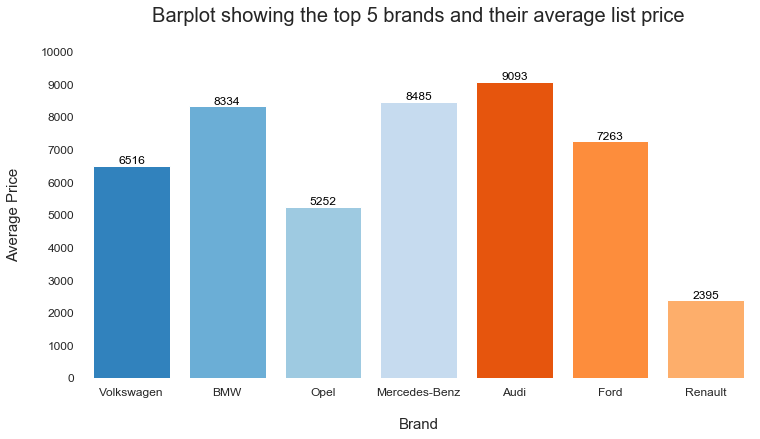

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 


fig = plt.figure(figsize=(12,6))

sns.set(style='white')

sns.barplot(x='index', y='mean_price', data = df.reset_index(), saturation = 1, palette = 'tab20c')

plt.title("Barplot showing the top 5 brands and their average list price", fontsize = 20, pad = 30)
plt.xlabel("Brand", fontsize = 15, labelpad = 20)
plt.ylabel("Average Price", fontsize = 15, labelpad = 20)

plt.xticks(np.arange(7), ["Volkswagen", "BMW", "Opel", "Mercedes-Benz", "Audi", "Ford", "Renault"], fontsize = 12)
plt.yticks(np.arange(0,10500,1000), fontsize = 12)

sns.despine(bottom = True, left = True)


for index, row in df.reset_index().iterrows():
    plt.text(index, row[2] + 50, str(int(row[2])), ha = 'center', color='black')   

plt.show()

Here is a good visualization of the prices for our favorite brands.

* Renault is clearly low tier.
* While Volkswagen and Opel are our middle tiers, Ford stands between high and mid tier.
* BMW, Mercedes-Benz and Audi are clearly more luxurious brands!